In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.integrate as integrate
from sklearn.cluster import KMeans

In [2]:
#collects all data and merges it into one dataframe
data=pd.read_csv("slr_sla_gbl_free_txj1j2_90.csv", sep=',',skiprows=5)
data.fillna(0,inplace=True)
data['global']=data['TOPEX/Poseidon']+data['Jason-1']+data['Jason-2']+data['Jason-3']
data.drop(['TOPEX/Poseidon','Jason-1','Jason-2','Jason-3'], axis=1, inplace=True)
data['year']=round(data['year'],2)
#repeated for every ocean of interest
atl_data=pd.read_csv("slr_sla_atl_free_txj1j2_90.csv", sep=',',skiprows=5)
atl_data.fillna(0,inplace=True)
data['atlantic']=atl_data['TOPEX/Poseidon']+atl_data['Jason-1']+atl_data['Jason-2']+atl_data['Jason-3']

car_data=pd.read_csv("slr_sla_crs_free_txj1j2_90.csv", sep=',',skiprows=5)
car_data.fillna(0,inplace=True)
data['carribean']=car_data['TOPEX/Poseidon']+car_data['Jason-1']+car_data['Jason-2']+car_data['Jason-3']

gom_data=pd.read_csv("slr_sla_gom_free_txj1j2_90.csv", sep=',',skiprows=5)
gom_data.fillna(0,inplace=True)
data['gulf']=gom_data['TOPEX/Poseidon']+gom_data['Jason-1']+gom_data['Jason-2']+gom_data['Jason-3']

ind_data=pd.read_csv("slr_sla_int_free_txj1j2_90.csv", sep=',',skiprows=5)
ind_data.fillna(0,inplace=True)
data['indonesia']=ind_data['TOPEX/Poseidon']+ind_data['Jason-1']+ind_data['Jason-2']+ind_data['Jason-3']

na_data=pd.read_csv("slr_sla_na_free_txj1j2.csv", sep=',',skiprows=5)
na_data.fillna(0,inplace=True)
data['north atlantic']=na_data['TOPEX/Poseidon']+na_data['Jason-1']+na_data['Jason-2']+na_data['Jason-3']

npac_data=pd.read_csv("slr_sla_np_keep_txj1j2.csv", sep=',',skiprows=5)
npac_data.fillna(0,inplace=True)
data['north pacific']=npac_data['TOPEX/Poseidon']+npac_data['Jason-1']+npac_data['Jason-2']+npac_data['Jason-3']

pac_data=pd.read_csv("slr_sla_pac_free_txj1j2_90.csv", sep=',',skiprows=5)
pac_data.fillna(0,inplace=True)
pac_data['pacific']=pac_data['TOPEX/Poseidon']+pac_data['Jason-1']+pac_data['Jason-2']+pac_data['Jason-3']

schi_data=pd.read_csv("slr_sla_scs_free_txj1j2_90.csv", sep=',',skiprows=5)
schi_data.fillna(0,inplace=True)
data['south china']=schi_data['TOPEX/Poseidon']+schi_data['Jason-1']+schi_data['Jason-2']+schi_data['Jason-3']

jap_data=pd.read_csv("slr_sla_soj_free_txj1j2_90.csv", sep=',',skiprows=5)
jap_data.fillna(0,inplace=True)
data['japan']=jap_data['TOPEX/Poseidon']+jap_data['Jason-1']+jap_data['Jason-2']+jap_data['Jason-3']

ind_data=pd.read_csv("slr_sla_atl_free_txj1j2_90.csv", sep=',',skiprows=5)
ind_data.fillna(0,inplace=True)
data['indian']=ind_data['TOPEX/Poseidon']+ind_data['Jason-1']+ind_data['Jason-2']+ind_data['Jason-3']


pac_data['year']=round(pac_data['year'],2)
data=pd.merge(data,pac_data[['year','pacific']],how='left',on='year')

north_data=pd.read_csv("north sea.csv", sep=',',skiprows=5)
north_data.fillna(0,inplace=True)
north_data['north sea']=north_data['TOPEX/Poseidon']+north_data['Jason-1']+north_data['Jason-2']+north_data['Jason-3']
north_data['year']=round(north_data['year'],2)
data=pd.merge(data,north_data[['year','north sea']],how='left',on='year')

data

,year,global,atlantic,carribean,gulf,indonesia,north atlantic,north pacific,south china,japan,indian,pacific,north sea
0,1992.96,-19.51,-25.13,-24.90,-6.18,-46.75,-18.43,19.09,-71.21,-68.45,-25.13,-13.22,-11.25
1,1992.99,-19.92,-17.46,-6.38,-2.36,-45.81,-10.31,-8.81,-75.25,-31.70,-17.46,-24.49,11.60
2,1993.01,-15.58,-16.91,-11.48,-1.98,-61.42,-17.66,-17.21,-67.88,0.70,-16.91,-20.79,30.46
3,1993.04,-19.39,-11.92,4.13,17.56,-76.99,-0.71,-44.01,-31.17,19.91,-11.92,-29.14,190.62
4,1993.07,-23.91,-19.11,4.64,16.28,-68.44,-20.29,-61.71,-15.08,-66.65,-19.11,-29.60,115.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,2020.35,65.14,64.80,85.01,65.79,-21.44,80.70,104.32,36.11,36.53,64.80,67.65,99.16
1851,2020.38,64.68,69.19,70.07,103.44,-14.93,74.59,125.92,50.54,60.80,69.19,76.74,106.32
1852,2020.41,66.45,75.51,74.37,103.35,-20.25,80.74,129.22,45.20,70.96,75.51,74.20,NaN
1853,2020.43,66.71,82.87,53.90,69.61,-25.98,67.07,129.62,73.45,98.40,82.87,66.44,38.03


In [3]:
bins=[]
bin_names=[]
j=0
for i in range(199250,202100,25):
    bins.append(i)
    bin_names.append(j)
    j+=1
bin_names=bin_names[:-1]
b=list(map(lambda x: x/100,bins))

# Groups data by quarters of the year
data['bins']=pd.cut(x=data['year'],bins=b,labels=bin_names,include_lowest=True,right=False)
gr=data.groupby(['bins']).mean()
groups=gr.copy(deep=True)

groups.drop([0,112],axis=0,inplace=True)
groups=groups.round(2)
groups

,year,global,atlantic,carribean,gulf,indonesia,north atlantic,north pacific,south china,japan,indian,pacific,north sea
bins,,,,,,,,,,,,,
1,1992.98,-19.72,-21.30,-15.64,-4.27,-46.28,-14.37,5.14,-73.23,-50.08,-21.30,-18.86,0.17
2,1993.12,-20.23,-19.06,-8.60,4.45,-67.55,-14.38,-52.40,-42.30,-25.19,-19.06,-21.81,56.53
3,1993.38,-17.22,-19.08,-15.50,-7.70,-82.62,-16.83,-40.48,-43.47,-8.04,-19.08,-13.64,-19.94
4,1993.62,-15.16,-17.86,-14.06,-6.99,-74.53,-19.66,20.54,-34.94,-66.88,-17.86,-12.60,-38.10
5,1993.87,-15.37,-13.39,-4.81,-3.87,-57.80,-16.12,22.70,-31.21,-32.21,-13.39,-12.90,-14.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2019.37,62.76,68.69,44.24,73.43,59.44,57.93,110.41,63.71,7.41,68.69,60.48,74.46
108,2019.62,65.22,73.40,48.10,64.01,18.10,69.90,94.01,40.39,-24.97,73.40,65.47,78.46
109,2019.86,64.50,70.11,44.70,82.57,19.88,60.64,28.99,45.31,27.93,70.11,58.60,42.44


In [6]:
#NEEDS TO BE RUN 3 TIMES 
def quarter(y):
    flo=math.floor(y)
    if y-flo<.25:
        return "Q1"
    elif y-flo<.5:
        return "Q2"
    elif y-flo<.75:
        return "Q3"
    else:
        return "Q4"

for index, row in groups.iterrows():
    groups.at[int(index),'quart']=quarter(row['year'])
    ye=str(math.floor(row['year']))
    groups.at[int(index),'yearID']= ye+" "+str(row['quart'])
    
gr = groups[['yearID', 'global', 'atlantic', 'carribean','gulf','indonesia', 'north atlantic','north pacific',
             'south china','japan','pacific','north sea','indian','year','quart']]
groups=gr.copy(deep=True)
groups

,yearID,global,atlantic,carribean,gulf,indonesia,north atlantic,north pacific,south china,japan,pacific,north sea,indian,year,quart
bins,,,,,,,,,,,,,,,
1,1992 Q4,-19.72,-21.30,-15.64,-4.27,-46.28,-14.37,5.14,-73.23,-50.08,-18.86,0.17,-21.30,1992.98,Q4
2,1993 Q1,-20.23,-19.06,-8.60,4.45,-67.55,-14.38,-52.40,-42.30,-25.19,-21.81,56.53,-19.06,1993.12,Q1
3,1993 Q2,-17.22,-19.08,-15.50,-7.70,-82.62,-16.83,-40.48,-43.47,-8.04,-13.64,-19.94,-19.08,1993.38,Q2
4,1993 Q3,-15.16,-17.86,-14.06,-6.99,-74.53,-19.66,20.54,-34.94,-66.88,-12.60,-38.10,-17.86,1993.62,Q3
5,1993 Q4,-15.37,-13.39,-4.81,-3.87,-57.80,-16.12,22.70,-31.21,-32.21,-12.90,-14.35,-13.39,1993.87,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2019 Q2,62.76,68.69,44.24,73.43,59.44,57.93,110.41,63.71,7.41,60.48,74.46,68.69,2019.37,Q2
108,2019 Q3,65.22,73.40,48.10,64.01,18.10,69.90,94.01,40.39,-24.97,65.47,78.46,73.40,2019.62,Q3
109,2019 Q4,64.50,70.11,44.70,82.57,19.88,60.64,28.99,45.31,27.93,58.60,42.44,70.11,2019.86,Q4


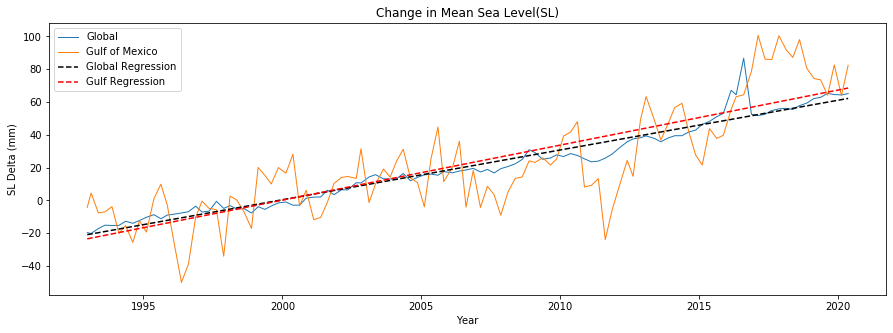

In [26]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(groups['year'],groups['global'],label="Global",linewidth=1)
plt.plot(groups['year'],groups['gulf'],label="Gulf of Mexico",linewidth=1)

plt.xlabel('Year')
plt.ylabel('SL Delta (mm)')
plt.title('Change in Mean Sea Level(SL)')

#create regression lines
x=groups['year'].to_numpy().reshape(-1, 1)
reg= LinearRegression().fit(x,groups['global'])
gulf_reg= LinearRegression().fit(x,groups['gulf'])
atl_reg= LinearRegression().fit(x,groups['atlantic'])

plt.plot(groups['year'], reg.coef_*groups['year'] + reg.intercept_, color='k',label='Global Regression',linewidth=1.5,linestyle='--')
plt.plot(groups['year'], gulf_reg.coef_*groups['year'] + gulf_reg.intercept_, color='r',label='Gulf Regression',linewidth=1.5,linestyle='--')
#plt.plot(groups['year'], atl_reg.coef_*groups['year'] + atl_reg.intercept_, color='g',label='Atlantic Regression',linewidth=1.5,linestyle='--')
plt.legend(loc="upper left")

plt.show()

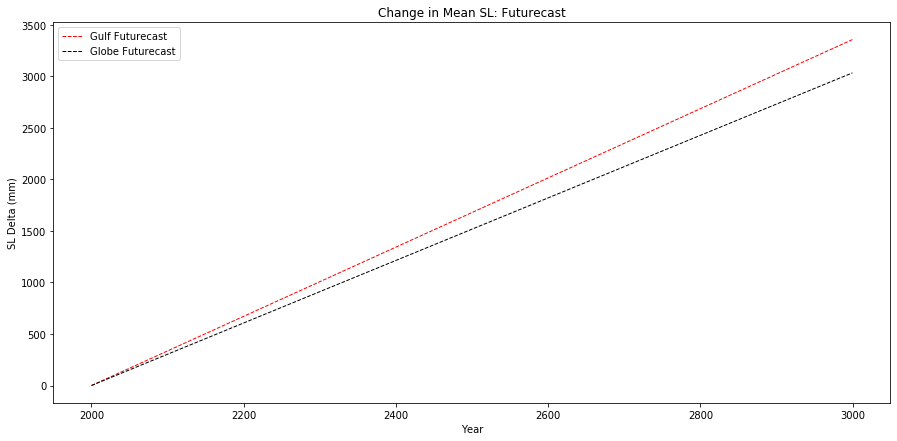

In [33]:
later=range(200000,300000,25)
#extends regression line to future. Only used for visual purposes
later_years=list(map(lambda x: x/100,later))
later_data=gulf_reg.predict(np.asarray(later_years).reshape(-1, 1))
future=pd.DataFrame(data=later_data,columns=['gulf rise per quarter'])
future['year']=later_years

late_globe_data=reg.predict(np.asarray(later_years).reshape(-1, 1))
future['globe']=late_globe_data
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(future['year'],future['gulf rise per quarter'],color='r',linewidth=1,label='Gulf Futurecast',linestyle='--')
plt.plot(future['year'],future['globe'],linewidth=1,label='Globe Futurecast',color='k',linestyle='--')


#pesacola is 5 meteres above sea level

plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('SL Delta (mm)')
plt.title('Change in Mean SL: Futurecast')

plt.show()

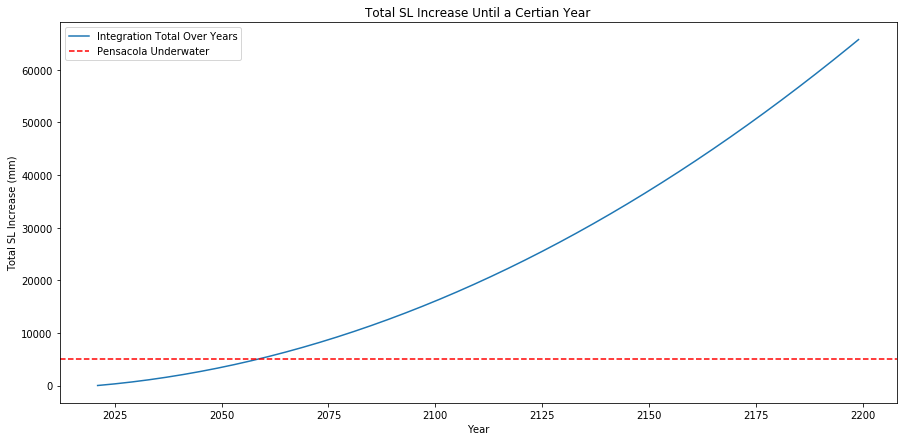

In [32]:
X=np.arange(2021, 2200, 1).tolist()
#creates an integration graph line that can be plotted and used to find the intersection of flooding parameter
def integrals(f):
    x_range = []
    y_range = []
    results = []
    for x in X:
        x_range.append(x)   
        y_range.append(float(f(x)))
        integral = integrate.simps(y_range, x_range)
        results.append(integral)
    return results
Y=integrals(lambda x: f(x))
plt.plot(X,Y,label='Integration Total Over Years')
plt.axhline(y=5000, color='r', linestyle='--',label='Pensacola Underwater')
plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Total SL Increase (mm)')
plt.title('Total SL Increase Until a Certian Year')
plt.show()

In [35]:
#finds the intersection of the two lines
close=min(Y, key=lambda x:abs(x-5000))
print(Y.index(close)+2021)

2058


In [58]:
#toyko-pacific
#sd-pacific
#london-north sea
#dc-atlantic
#sydney-pacific
#new york-atlantic
#shanghai-china sea
#jeju sk-japan
#busan sk-japan
#singapore-indo
#mumbai ind-indian

# Method that calculates when a city will flood given the ocean and how high above sea level it is, in mm.
def when(ocean,mm):
    x=groups['year'].to_numpy().reshape(-1, 1)
    r= LinearRegression().fit(x,groups[ocean])
    m=r.coef_
    b=r.intercept_
    f=lambda x: m*x+b
    Y=integrals(lambda x: f(x))
    close=min(Y, key=lambda x:abs(x-mm))
    date=Y.index(close)+2021
    return date,Y
    
# Creates a dataframe for expanded scope and adds a few more citites
city_names=['Toyko','San Fransisco','London','DC','Sydney','New York','Shanghai','Jeju', 'Busan','Singapore','Mumbai','Pensacola']
city_sl=[40,15,11,25,50,33,13,20,21,56,5,5]
city_ocean=['pacific','pacific','north sea','atlantic','pacific','atlantic','south china','japan','japan','indonesia','indian','gulf']
cities=pd.DataFrame({'name':city_names,'SL (m)':city_sl,'ocean':city_ocean,'data':0})
cities['SL (mm)']= cities['SL (m)']*1000
cities=cities.astype(object)

for index, row in cities.iterrows():
    date,ye=when(row['ocean'],row['SL (mm)'])
    cities.at[int(index),'year']=date
    cities.at[int(index),'data']=np.array(ye)
    
cities

,name,SL (m),ocean,data,SL (mm),year
0,Toyko,40,pacific,"[0.0, 62.0283891965646, 126.92881772351544, 19...",40000,2168.0
1,San Fransisco,15,pacific,"[0.0, 62.0283891965646, 126.92881772351544, 19...",15000,2104.0
2,London,11,north sea,"[0.0, 66.46880115847125, 135.66341130335604, 2...",11000,2090.0
3,DC,25,atlantic,"[0.0, 67.65461405530914, 138.44488605690245, 2...",25000,2128.0
4,Sydney,50,pacific,"[0.0, 62.0283891965646, 126.92881772351544, 19...",50000,2188.0
5,New York,33,atlantic,"[0.0, 67.65461405530914, 138.44488605690245, 2...",33000,2147.0
6,Shanghai,13,south china,"[0.0, 74.81979670398869, 153.24787316975926, 2...",13000,2088.0
7,Jeju,20,japan,"[0.0, 58.96177047991432, 120.6617068908381, 18...",20000,2123.0
8,Busan,21,japan,"[0.0, 58.96177047991432, 120.6617068908381, 18...",21000,2126.0
9,Singapore,56,indonesia,"[0.0, 75.08510519390074, 153.4192411727178, 23...",56000,2185.0


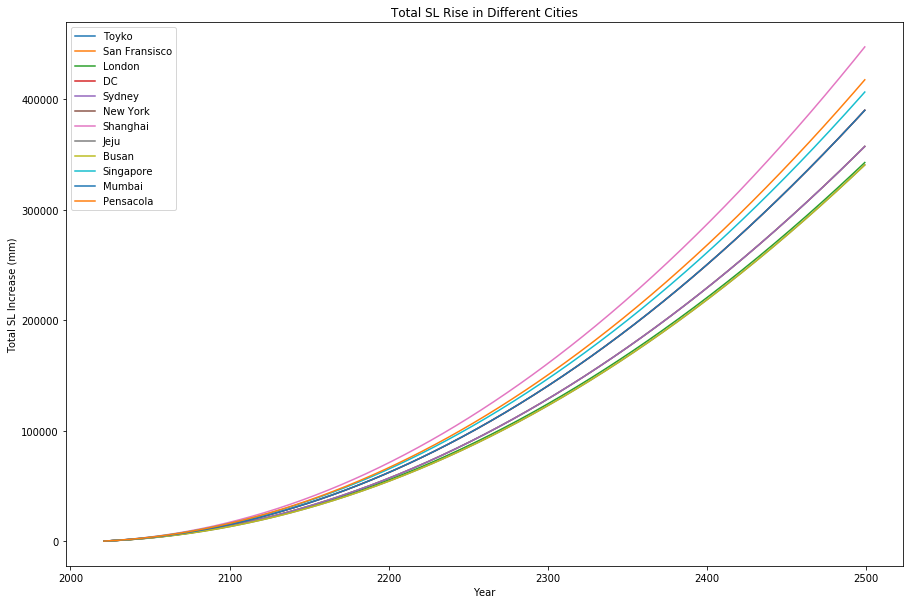

In [84]:
# graphs each cities integration line, really representing the ocean the city is influenced by
plt.rcParams["figure.figsize"] = (15,10)
X=np.arange(2021, 2500, 1).tolist()

for index, row in cities.iterrows():
    plt.plot(X,row['data'],label=row['name'])
    #plt.axhline(y=row['SL (mm)'],linestyle='--')
    
    
plt.xlabel('Year')
plt.ylabel('Total SL Increase (mm)')
plt.title('Total SL Rise in Different Cities')
plt.legend(loc="upper left")
plt.show()

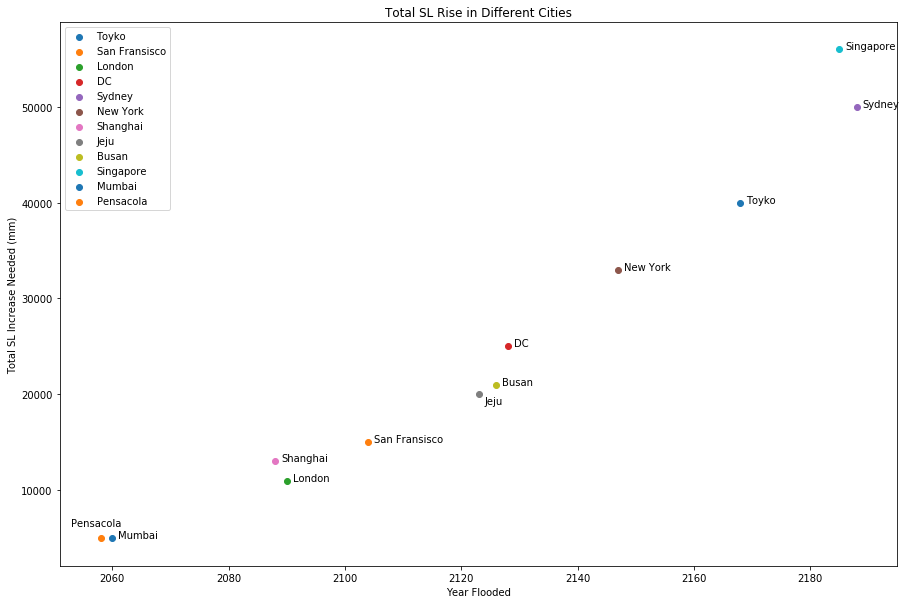

In [85]:
# plots the predicted flood year with how far the sea level has to increase
fig, ax = plt.subplots()
for index, row in cities.iterrows():
    ax.scatter(row['year'],row['SL (mm)'],label=row['name'])
    if cities.at[index,'name']=="Pensacola":
        ax.annotate(row['name'], (row['year']-5, row['SL (mm)']+1300))
    elif cities.at[index,'name']=="Jeju":
        ax.annotate(row['name'], (row['year']+1, row['SL (mm)']-1000))
    else:
        ax.annotate(row['name'], (row['year']+1, row['SL (mm)']+1))
    
plt.xlabel('Year Flooded')
plt.ylabel('Total SL Increase Needed (mm)')
plt.title('Total SL Rise in Different Cities')
plt.legend(loc="upper left")
plt.show()

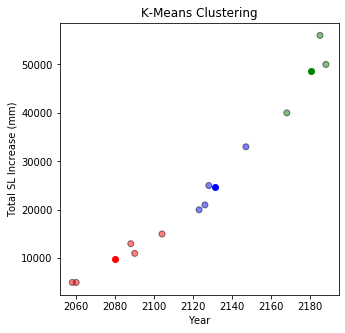

In [86]:
# preforms k means clustering on flood year vs total increase needed 
means=pd.DataFrame({'x':cities['year'],'y':cities['SL (mm)']})
colmap = {1: 'r', 2: 'g', 3: 'b'}

kmeans = KMeans(n_clusters=3)
kmeans.fit(means)
labels = kmeans.predict(means)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(5, 5))

colors =list(map(lambda x: colmap[x+1], labels))

plt.scatter(means['x'], means['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.xlabel('Year')
plt.ylabel('Total SL Increase (mm)')
plt.title('K-Means Clustering')
plt.show()